<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_4'

In [4]:
os.listdir(base_path)

['data_add_delta_4_n20.csv',
 'data_add_delta_4_n30.csv',
 'data_add_delta_4_n60.csv',
 'data_add_delta_4_n120.csv',
 'data_add_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.277849,33.698513,22.278563,-1022.276459,-920.021533,2777.530868,-3697.552401
1,0.0,1.0,71.303133,68.723889,72.243998,-1029.060277,-806.789257,-963.462068,156.672811
2,0.0,2.0,94.354353,49.043426,57.249191,-3495.201934,-3284.554963,881.402545,-4165.957508
3,0.0,3.0,46.948350,49.771017,61.516974,3814.587307,3982.823648,-431.639006,4414.462654
4,0.0,4.0,83.440051,86.095215,29.612178,18127.904084,18337.051529,2799.538655,15537.512873
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,96.541199,84.852835,76.464596,-2061.906745,-1794.048114,21.249416,-1815.297530
19996,999.0,16.0,36.785156,88.161506,74.835889,-5413.062117,-5203.279567,-2321.427158,-2881.852409
19997,999.0,17.0,86.263984,84.726792,91.646824,8845.881269,9118.518869,-25.362416,9143.881285
19998,999.0,18.0,71.164899,47.106123,20.358857,1099.715019,1248.344898,-552.634631,1800.979529


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.277849,33.698513,22.278563,-1022.276459,-920.021533,2777.530868,-3697.552401
1,0.0,1.0,71.303133,68.723889,72.243998,-1029.060277,-806.789257,-963.462068,156.672811
2,0.0,2.0,94.354353,49.043426,57.249191,-3495.201934,-3284.554963,881.402545,-4165.957508
3,0.0,3.0,46.948350,49.771017,61.516974,3814.587307,3982.823648,-431.639006,4414.462654
4,0.0,4.0,83.440051,86.095215,29.612178,18127.904084,18337.051529,2799.538655,15537.512873
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,96.541199,84.852835,76.464596,-2061.906745,-1794.048114,21.249416,-1815.297530
19996,999.0,16.0,36.785156,88.161506,74.835889,-5413.062117,-5203.279567,-2321.427158,-2881.852409
19997,999.0,17.0,86.263984,84.726792,91.646824,8845.881269,9118.518869,-25.362416,9143.881285
19998,999.0,18.0,71.164899,47.106123,20.358857,1099.715019,1248.344898,-552.634631,1800.979529


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    36.277849  33.698513  ...  2777.530868  -3697.552401
      1.0    71.303133  68.723889  ...  -963.462068    156.672811
      2.0    94.354353  49.043426  ...   881.402545  -4165.957508
      3.0    46.948350  49.771017  ...  -431.639006   4414.462654
      4.0    83.440051  86.095215  ...  2799.538655  15537.512873
...                ...        ...  ...          ...           ...
999.0 15.0   96.541199  84.852835  ...    21.249416  -1815.297530
      16.0   36.785156  88.161506  ... -2321.427158  -2881.852409
      17.0   86.263984  84.726792  ...   -25.362416   9143.881285
      18.0   71.164899  47.106123  ...  -552.634631   1800.979529
      19.0   75.981087  76.815826  ...  -222.065358   2229.545910

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    36.277849  33.698513  ...  2777.530868  -3697.552401
      1.0    71.303133  68.723889  ...  -963.462068    156.672811
      2.0    94.354353  49.043426  ...   881.402545  -4165.957508
      3.0    46.948350  49.771017  ...  -431.639006   4414.462654
      4.0    83.440051  86.095215  ...  2799.538655  15537.512873
...                ...        ...  ...          ...           ...
999.0 15.0   96.541199  84.852835  ...    21.249416  -1815.297530
      16.0   36.785156  88.161506  ... -2321.427158  -2881.852409
      17.0   86.263984  84.726792  ...   -25.362416   9143.881285
      18.0   71.164899  47.106123  ...  -552.634631   1800.979529
      19.0   75.981087  76.815826  ...  -222.065358   2229.545910

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.277849,33.698513,22.278563,-1022.276459,-920.021533,2777.530868,-3697.552401
1,0.0,1.0,71.303133,68.723889,72.243998,-1029.060277,-806.789257,-963.462068,156.672811
2,0.0,2.0,94.354353,49.043426,57.249191,-3495.201934,-3284.554963,881.402545,-4165.957508
3,0.0,3.0,46.948350,49.771017,61.516974,3814.587307,3982.823648,-431.639006,4414.462654
4,0.0,4.0,83.440051,86.095215,29.612178,18127.904084,18337.051529,2799.538655,15537.512873
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,96.541199,84.852835,76.464596,-2061.906745,-1794.048114,21.249416,-1815.297530
19996,999.0,16.0,36.785156,88.161506,74.835889,-5413.062117,-5203.279567,-2321.427158,-2881.852409
19997,999.0,17.0,86.263984,84.726792,91.646824,8845.881269,9118.518869,-25.362416,9143.881285
19998,999.0,18.0,71.164899,47.106123,20.358857,1099.715019,1248.344898,-552.634631,1800.979529


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    36.277849  33.698513  ...  2777.530868  -3697.552401
      1.0    71.303133  68.723889  ...  -963.462068    156.672811
      2.0    94.354353  49.043426  ...   881.402545  -4165.957508
      3.0    46.948350  49.771017  ...  -431.639006   4414.462654
      4.0    83.440051  86.095215  ...  2799.538655  15537.512873
...                ...        ...  ...          ...           ...
999.0 15.0   96.541199  84.852835  ...    21.249416  -1815.297530
      16.0   36.785156  88.161506  ... -2321.427158  -2881.852409
      17.0   86.263984  84.726792  ...   -25.362416   9143.881285
      18.0   71.164899  47.106123  ...  -552.634631   1800.979529
      19.0   75.981087  76.815826  ...  -222.065358   2229.545910

[20000 rows x 7 columns]

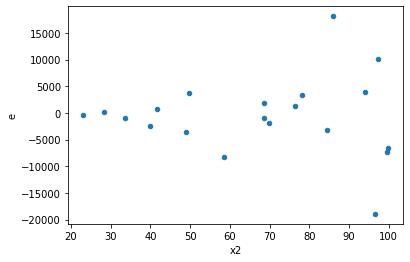

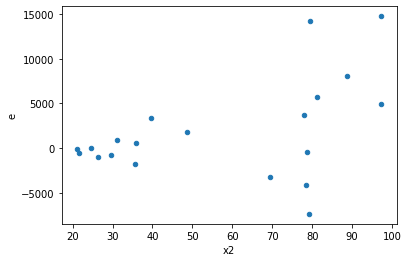

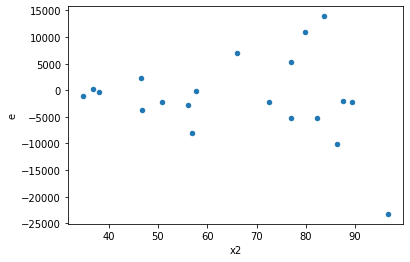

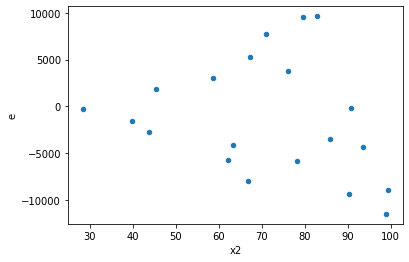

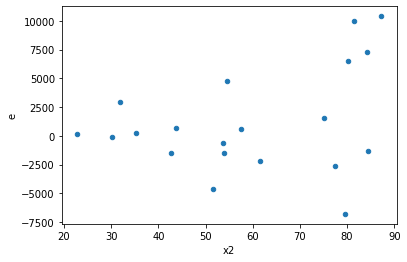

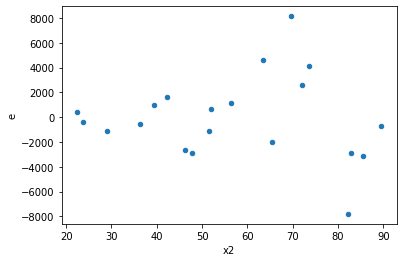

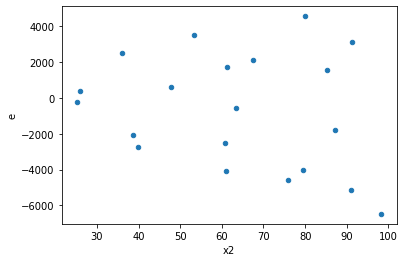

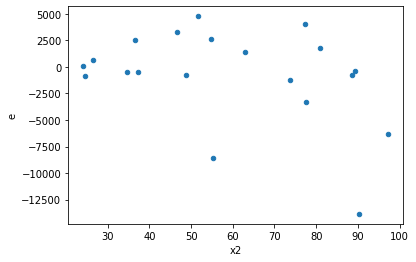

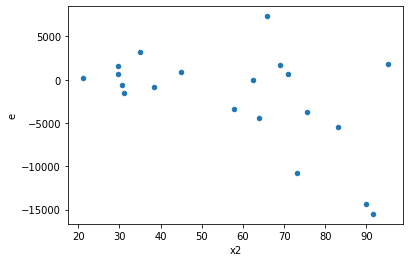

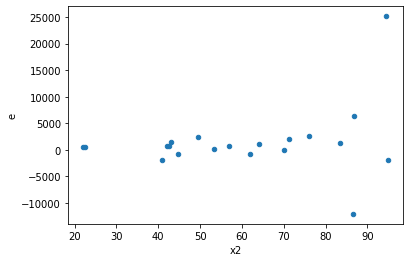

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,47247456.08532469,314654386.70750874,9449491.217064938,62930877.34150175,6.659710654882054,0.057793652385756955,0.9711031738071215,0.028896826192878478,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,1520360.0579408593,103243299.18711905,304072.0115881719,20648659.83742381,67.90713729151067,0.00027138251505398614,0.999864308742473,0.00013569125752699307,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,25562243.237409387,249708289.6937643,5112448.647481877,49941657.93875286,9.768637571225579,0.0257626053030926,0.9871186973484537,0.0128813026515463,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,69942451.43641543,108274615.19813734,13988490.287283087,21654923.03962747,1.548052905988999,0.6432443219961246,0.6783778390019377,0.3216221609980623,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,13853503.929726852,210104951.02353776,2770700.7859453703,42020990.20470755,15.166195649080121,0.009662769989396747,0.9951686150053016,0.004831384994698373,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,12056956.065621153,124620986.42249218,2411391.2131242305,24924197.284498435,10.336023930437365,0.022779516869103622,0.9886102415654482,0.011389758434551811,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,23278821.525331896,104413186.16758205,4655764.305066379,20882637.23351641,4.485329553902037,0.1251586114421357,0.9374206942789322,0.06257930572106785,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,14849737.20886913,103504062.48249961,2969947.441773826,20700812.496499922,6.97009388291942,0.052643354746428006,0.973678322626786,0.026321677373214003,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,9468653.30731158,129262702.49248831,1893730.6614623158,25852540.49849766,13.651645941315985,0.012268512432309864,0.9938657437838451,0.006134256216154932,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,47247456.08532469,314654386.70750874,9449491.217064938,62930877.34150175,6.659710654882054,0.057793652385756955,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,1520360.0579408593,103243299.18711905,304072.0115881719,20648659.83742381,67.90713729151067,0.00027138251505398614,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,25562243.237409387,249708289.6937643,5112448.647481877,49941657.93875286,9.768637571225579,0.0257626053030926,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,69942451.43641543,108274615.19813734,13988490.287283087,21654923.03962747,1.548052905988999,0.6432443219961246,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,13853503.929726852,210104951.02353776,2770700.7859453703,42020990.20470755,15.166195649080121,0.009662769989396747,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,12056956.065621153,124620986.42249218,2411391.2131242305,24924197.284498435,10.336023930437365,0.022779516869103622,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,23278821.525331896,104413186.16758205,4655764.305066379,20882637.23351641,4.485329553902037,0.1251586114421357,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,14849737.20886913,103504062.48249961,2969947.441773826,20700812.496499922,6.97009388291942,0.052643354746428006,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,9468653.30731158,129262702.49248831,1893730.6614623158,25852540.49849766,13.651645941315985,0.012268512432309864,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    615
Reject001=1 : Homoscedasticity      385
Name: Result_test, dtype: int64